In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 5

setup_random_seed(RANDOM_SEED)

In [2]:
df = pd.read_csv('data/01_raw/CatData/sydney_house/SydneyHousePrices.csv')

In [3]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Date', 'Id', 'sellPrice'])
y = np.log10(df[['sellPrice']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((159603, 6), (39901, 6))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['suburb', 'postalCode', 'propType'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_state=RANDOM_SEED
)

In [8]:
%time model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.0020310	test: 0.0069262	best: 0.0069262 (0)	total: 94.7ms	remaining: 3m 9s
1:	learn: -0.0215429	test: -0.0173572	best: -0.0173572 (1)	total: 118ms	remaining: 1m 57s
2:	learn: -0.0415271	test: -0.0380001	best: -0.0380001 (2)	total: 140ms	remaining: 1m 33s
3:	learn: -0.0597499	test: -0.0564481	best: -0.0564481 (3)	total: 158ms	remaining: 1m 19s
4:	learn: -0.0745438	test: -0.0716731	best: -0.0716731 (4)	total: 177ms	remaining: 1m 10s
5:	learn: -0.0887048	test: -0.0863510	best: -0.0863510 (5)	total: 198ms	remaining: 1m 5s
6:	learn: -0.1021661	test: -0.0996783	best: -0.0996783 (6)	total: 218ms	remaining: 1m 2s
7:	learn: -0.1131139	test: -0.1109559	best: -0.1109559 (7)	total: 236ms	remaining: 58.8s
8:	learn: -0.1250578	test: -0.1229920	best: -0.1229920 (8)	total: 252ms	remaining: 55.7s
9:	learn: -0.1358699	test: -0.1339361	best: -0.1339361 (9)	total: 269ms	remaining: 53.5s
10:	learn: -0.1468064	test: -0.1452429	best: -0.1452429 (10)	total: 285ms	remaining: 51.6s
11:	learn: -0.156

102:	learn: -0.4670390	test: -0.4465488	best: -0.4465488 (102)	total: 1.74s	remaining: 32s
103:	learn: -0.4698379	test: -0.4481514	best: -0.4481514 (103)	total: 1.76s	remaining: 32s
104:	learn: -0.4705517	test: -0.4486876	best: -0.4486876 (104)	total: 1.77s	remaining: 32s
105:	learn: -0.4718263	test: -0.4493793	best: -0.4493793 (105)	total: 1.79s	remaining: 31.9s
106:	learn: -0.4723667	test: -0.4497120	best: -0.4497120 (106)	total: 1.8s	remaining: 31.9s
107:	learn: -0.4729218	test: -0.4498539	best: -0.4498539 (107)	total: 1.82s	remaining: 31.9s
108:	learn: -0.4733626	test: -0.4500511	best: -0.4500511 (108)	total: 1.84s	remaining: 31.9s
109:	learn: -0.4742703	test: -0.4502896	best: -0.4502896 (109)	total: 1.86s	remaining: 31.9s
110:	learn: -0.4754193	test: -0.4510005	best: -0.4510005 (110)	total: 1.87s	remaining: 31.8s
111:	learn: -0.4765922	test: -0.4519624	best: -0.4519624 (111)	total: 1.89s	remaining: 31.9s
112:	learn: -0.4780988	test: -0.4529609	best: -0.4529609 (112)	total: 1.91s	r

201:	learn: -0.5269996	test: -0.4774362	best: -0.4774740 (199)	total: 3.19s	remaining: 28.4s
202:	learn: -0.5275766	test: -0.4775254	best: -0.4775254 (202)	total: 3.22s	remaining: 28.5s
203:	learn: -0.5279822	test: -0.4779051	best: -0.4779051 (203)	total: 3.23s	remaining: 28.5s
204:	learn: -0.5281300	test: -0.4780214	best: -0.4780214 (204)	total: 3.25s	remaining: 28.4s
205:	learn: -0.5289688	test: -0.4791021	best: -0.4791021 (205)	total: 3.26s	remaining: 28.4s
206:	learn: -0.5294366	test: -0.4791217	best: -0.4791217 (206)	total: 3.28s	remaining: 28.4s
207:	learn: -0.5301500	test: -0.4798160	best: -0.4798160 (207)	total: 3.3s	remaining: 28.4s
208:	learn: -0.5310512	test: -0.4800300	best: -0.4800300 (208)	total: 3.31s	remaining: 28.4s
209:	learn: -0.5314631	test: -0.4800854	best: -0.4800854 (209)	total: 3.33s	remaining: 28.4s
210:	learn: -0.5318380	test: -0.4803694	best: -0.4803694 (210)	total: 3.35s	remaining: 28.4s
211:	learn: -0.5319501	test: -0.4804396	best: -0.4804396 (211)	total: 3

295:	learn: -0.5614870	test: -0.4935771	best: -0.4935771 (295)	total: 4.66s	remaining: 26.8s
296:	learn: -0.5615893	test: -0.4936247	best: -0.4936247 (296)	total: 4.68s	remaining: 26.8s
297:	learn: -0.5617306	test: -0.4938914	best: -0.4938914 (297)	total: 4.69s	remaining: 26.8s
298:	learn: -0.5620793	test: -0.4942266	best: -0.4942266 (298)	total: 4.71s	remaining: 26.8s
299:	learn: -0.5622849	test: -0.4943560	best: -0.4943560 (299)	total: 4.72s	remaining: 26.8s
300:	learn: -0.5624398	test: -0.4943427	best: -0.4943560 (299)	total: 4.74s	remaining: 26.8s
301:	learn: -0.5632838	test: -0.4942508	best: -0.4943560 (299)	total: 4.75s	remaining: 26.7s
302:	learn: -0.5632873	test: -0.4942024	best: -0.4943560 (299)	total: 4.76s	remaining: 26.7s
303:	learn: -0.5641228	test: -0.4951460	best: -0.4951460 (303)	total: 4.78s	remaining: 26.6s
304:	learn: -0.5642934	test: -0.4951417	best: -0.4951460 (303)	total: 4.79s	remaining: 26.6s
305:	learn: -0.5648228	test: -0.4956272	best: -0.4956272 (305)	total: 

387:	learn: -0.5851586	test: -0.5042180	best: -0.5042180 (387)	total: 6.09s	remaining: 25.3s
388:	learn: -0.5854244	test: -0.5044344	best: -0.5044344 (388)	total: 6.11s	remaining: 25.3s
389:	learn: -0.5858200	test: -0.5047207	best: -0.5047207 (389)	total: 6.12s	remaining: 25.3s
390:	learn: -0.5858223	test: -0.5046736	best: -0.5047207 (389)	total: 6.12s	remaining: 25.2s
391:	learn: -0.5860666	test: -0.5049181	best: -0.5049181 (391)	total: 6.14s	remaining: 25.2s
392:	learn: -0.5863176	test: -0.5055789	best: -0.5055789 (392)	total: 6.16s	remaining: 25.2s
393:	learn: -0.5869140	test: -0.5063563	best: -0.5063563 (393)	total: 6.17s	remaining: 25.2s
394:	learn: -0.5874078	test: -0.5066886	best: -0.5066886 (394)	total: 6.19s	remaining: 25.1s
395:	learn: -0.5876440	test: -0.5068716	best: -0.5068716 (395)	total: 6.2s	remaining: 25.1s
396:	learn: -0.5877892	test: -0.5068475	best: -0.5068716 (395)	total: 6.21s	remaining: 25.1s
397:	learn: -0.5880796	test: -0.5067982	best: -0.5068716 (395)	total: 6

476:	learn: -0.6105378	test: -0.5199924	best: -0.5201560 (473)	total: 7.54s	remaining: 24.1s
477:	learn: -0.6107691	test: -0.5202395	best: -0.5202395 (477)	total: 7.56s	remaining: 24.1s
478:	learn: -0.6110756	test: -0.5201237	best: -0.5202395 (477)	total: 7.58s	remaining: 24.1s
479:	learn: -0.6112453	test: -0.5203337	best: -0.5203337 (479)	total: 7.6s	remaining: 24.1s
480:	learn: -0.6114052	test: -0.5203058	best: -0.5203337 (479)	total: 7.62s	remaining: 24.1s
481:	learn: -0.6119316	test: -0.5206066	best: -0.5206066 (481)	total: 7.64s	remaining: 24s
482:	learn: -0.6120624	test: -0.5204599	best: -0.5206066 (481)	total: 7.66s	remaining: 24.1s
483:	learn: -0.6122434	test: -0.5204968	best: -0.5206066 (481)	total: 7.68s	remaining: 24.1s
484:	learn: -0.6125591	test: -0.5206441	best: -0.5206441 (484)	total: 7.7s	remaining: 24.1s
485:	learn: -0.6128903	test: -0.5211132	best: -0.5211132 (485)	total: 7.72s	remaining: 24s
486:	learn: -0.6134838	test: -0.5212956	best: -0.5212956 (486)	total: 7.73s	

576:	learn: -0.6292267	test: -0.5300574	best: -0.5300574 (576)	total: 9.19s	remaining: 22.7s
577:	learn: -0.6293159	test: -0.5301513	best: -0.5301513 (577)	total: 9.21s	remaining: 22.7s
578:	learn: -0.6294211	test: -0.5301538	best: -0.5301538 (578)	total: 9.22s	remaining: 22.6s
579:	learn: -0.6294914	test: -0.5301316	best: -0.5301538 (578)	total: 9.24s	remaining: 22.6s
580:	learn: -0.6295351	test: -0.5300711	best: -0.5301538 (578)	total: 9.26s	remaining: 22.6s
581:	learn: -0.6295966	test: -0.5301726	best: -0.5301726 (581)	total: 9.27s	remaining: 22.6s
582:	learn: -0.6297364	test: -0.5301631	best: -0.5301726 (581)	total: 9.29s	remaining: 22.6s
583:	learn: -0.6298690	test: -0.5303031	best: -0.5303031 (583)	total: 9.3s	remaining: 22.5s
584:	learn: -0.6300258	test: -0.5302460	best: -0.5303031 (583)	total: 9.32s	remaining: 22.5s
585:	learn: -0.6301947	test: -0.5303572	best: -0.5303572 (585)	total: 9.33s	remaining: 22.5s
586:	learn: -0.6303198	test: -0.5302337	best: -0.5303572 (585)	total: 9

676:	learn: -0.6384869	test: -0.5356005	best: -0.5357049 (672)	total: 10.9s	remaining: 21.2s
677:	learn: -0.6385625	test: -0.5357508	best: -0.5357508 (677)	total: 10.9s	remaining: 21.2s
678:	learn: -0.6386078	test: -0.5357266	best: -0.5357508 (677)	total: 10.9s	remaining: 21.2s
679:	learn: -0.6386891	test: -0.5356802	best: -0.5357508 (677)	total: 10.9s	remaining: 21.2s
680:	learn: -0.6387212	test: -0.5356482	best: -0.5357508 (677)	total: 10.9s	remaining: 21.1s
681:	learn: -0.6387505	test: -0.5356136	best: -0.5357508 (677)	total: 10.9s	remaining: 21.1s
682:	learn: -0.6389603	test: -0.5357182	best: -0.5357508 (677)	total: 11s	remaining: 21.1s
683:	learn: -0.6391349	test: -0.5358035	best: -0.5358035 (683)	total: 11s	remaining: 21.1s
684:	learn: -0.6393561	test: -0.5357272	best: -0.5358035 (683)	total: 11s	remaining: 21.1s
685:	learn: -0.6396192	test: -0.5356497	best: -0.5358035 (683)	total: 11s	remaining: 21.1s
686:	learn: -0.6398117	test: -0.5359693	best: -0.5359693 (686)	total: 11s	rema

771:	learn: -0.6469131	test: -0.5399017	best: -0.5399017 (771)	total: 12.5s	remaining: 19.9s
772:	learn: -0.6469604	test: -0.5399785	best: -0.5399785 (772)	total: 12.5s	remaining: 19.9s
773:	learn: -0.6469962	test: -0.5399451	best: -0.5399785 (772)	total: 12.6s	remaining: 19.9s
774:	learn: -0.6470394	test: -0.5399779	best: -0.5399785 (772)	total: 12.6s	remaining: 19.9s
775:	learn: -0.6470877	test: -0.5400279	best: -0.5400279 (775)	total: 12.6s	remaining: 19.8s
776:	learn: -0.6471452	test: -0.5400367	best: -0.5400367 (776)	total: 12.6s	remaining: 19.8s
777:	learn: -0.6472130	test: -0.5401049	best: -0.5401049 (777)	total: 12.6s	remaining: 19.8s
778:	learn: -0.6472356	test: -0.5401205	best: -0.5401205 (778)	total: 12.6s	remaining: 19.8s
779:	learn: -0.6473100	test: -0.5402920	best: -0.5402920 (779)	total: 12.6s	remaining: 19.8s
780:	learn: -0.6473595	test: -0.5402321	best: -0.5402920 (779)	total: 12.7s	remaining: 19.8s
781:	learn: -0.6474747	test: -0.5402447	best: -0.5402920 (779)	total: 

864:	learn: -0.6520763	test: -0.5427321	best: -0.5427608 (863)	total: 14.2s	remaining: 18.6s
865:	learn: -0.6520988	test: -0.5427313	best: -0.5427608 (863)	total: 14.2s	remaining: 18.6s
866:	learn: -0.6522191	test: -0.5426872	best: -0.5427608 (863)	total: 14.2s	remaining: 18.6s
867:	learn: -0.6524120	test: -0.5426844	best: -0.5427608 (863)	total: 14.3s	remaining: 18.6s
868:	learn: -0.6524530	test: -0.5427564	best: -0.5427608 (863)	total: 14.3s	remaining: 18.6s
869:	learn: -0.6524966	test: -0.5429276	best: -0.5429276 (869)	total: 14.3s	remaining: 18.6s
870:	learn: -0.6525356	test: -0.5428637	best: -0.5429276 (869)	total: 14.3s	remaining: 18.6s
871:	learn: -0.6525506	test: -0.5428699	best: -0.5429276 (869)	total: 14.3s	remaining: 18.6s
872:	learn: -0.6526326	test: -0.5422918	best: -0.5429276 (869)	total: 14.4s	remaining: 18.5s
873:	learn: -0.6526599	test: -0.5423220	best: -0.5429276 (869)	total: 14.4s	remaining: 18.5s
874:	learn: -0.6527157	test: -0.5423701	best: -0.5429276 (869)	total: 

953:	learn: -0.6563774	test: -0.5437307	best: -0.5438839 (939)	total: 15.6s	remaining: 17.1s
954:	learn: -0.6564008	test: -0.5437254	best: -0.5438839 (939)	total: 15.7s	remaining: 17.1s
955:	learn: -0.6564135	test: -0.5437209	best: -0.5438839 (939)	total: 15.7s	remaining: 17.1s
956:	learn: -0.6564359	test: -0.5437433	best: -0.5438839 (939)	total: 15.7s	remaining: 17.1s
957:	learn: -0.6564875	test: -0.5437363	best: -0.5438839 (939)	total: 15.7s	remaining: 17.1s
958:	learn: -0.6565122	test: -0.5436879	best: -0.5438839 (939)	total: 15.7s	remaining: 17.1s
959:	learn: -0.6565182	test: -0.5436980	best: -0.5438839 (939)	total: 15.7s	remaining: 17s
960:	learn: -0.6565788	test: -0.5437829	best: -0.5438839 (939)	total: 15.8s	remaining: 17s
961:	learn: -0.6566143	test: -0.5437226	best: -0.5438839 (939)	total: 15.8s	remaining: 17s
962:	learn: -0.6566458	test: -0.5437210	best: -0.5438839 (939)	total: 15.8s	remaining: 17s
963:	learn: -0.6566719	test: -0.5437196	best: -0.5438839 (939)	total: 15.8s	re

1050:	learn: -0.6619630	test: -0.5462620	best: -0.5463868 (1049)	total: 17.3s	remaining: 15.6s
1051:	learn: -0.6620193	test: -0.5464341	best: -0.5464341 (1051)	total: 17.3s	remaining: 15.6s
1052:	learn: -0.6620809	test: -0.5464043	best: -0.5464341 (1051)	total: 17.4s	remaining: 15.6s
1053:	learn: -0.6622443	test: -0.5463133	best: -0.5464341 (1051)	total: 17.4s	remaining: 15.6s
1054:	learn: -0.6622673	test: -0.5463494	best: -0.5464341 (1051)	total: 17.4s	remaining: 15.6s
1055:	learn: -0.6623824	test: -0.5462444	best: -0.5464341 (1051)	total: 17.4s	remaining: 15.6s
1056:	learn: -0.6624613	test: -0.5462549	best: -0.5464341 (1051)	total: 17.4s	remaining: 15.5s
1057:	learn: -0.6625319	test: -0.5462988	best: -0.5464341 (1051)	total: 17.4s	remaining: 15.5s
1058:	learn: -0.6626453	test: -0.5464265	best: -0.5464341 (1051)	total: 17.5s	remaining: 15.5s
1059:	learn: -0.6626919	test: -0.5463722	best: -0.5464341 (1051)	total: 17.5s	remaining: 15.5s
1060:	learn: -0.6627353	test: -0.5464494	best: -0.

1147:	learn: -0.6667561	test: -0.5487521	best: -0.5487521 (1147)	total: 19s	remaining: 14.1s
1148:	learn: -0.6667693	test: -0.5487596	best: -0.5487596 (1148)	total: 19s	remaining: 14.1s
1149:	learn: -0.6667779	test: -0.5487447	best: -0.5487596 (1148)	total: 19s	remaining: 14.1s
1150:	learn: -0.6668014	test: -0.5486972	best: -0.5487596 (1148)	total: 19.1s	remaining: 14.1s
1151:	learn: -0.6668165	test: -0.5486971	best: -0.5487596 (1148)	total: 19.1s	remaining: 14s
1152:	learn: -0.6668735	test: -0.5487508	best: -0.5487596 (1148)	total: 19.1s	remaining: 14s
1153:	learn: -0.6669523	test: -0.5487686	best: -0.5487686 (1153)	total: 19.1s	remaining: 14s
1154:	learn: -0.6669744	test: -0.5487569	best: -0.5487686 (1153)	total: 19.1s	remaining: 14s
1155:	learn: -0.6669871	test: -0.5487764	best: -0.5487764 (1155)	total: 19.2s	remaining: 14s
1156:	learn: -0.6670357	test: -0.5487825	best: -0.5487825 (1156)	total: 19.2s	remaining: 14s
1157:	learn: -0.6670814	test: -0.5488045	best: -0.5488045 (1157)	tot

1237:	learn: -0.6698955	test: -0.5502590	best: -0.5502590 (1237)	total: 20.7s	remaining: 12.7s
1238:	learn: -0.6699267	test: -0.5502855	best: -0.5502855 (1238)	total: 20.7s	remaining: 12.7s
1239:	learn: -0.6700262	test: -0.5502946	best: -0.5502946 (1239)	total: 20.7s	remaining: 12.7s
1240:	learn: -0.6700753	test: -0.5502474	best: -0.5502946 (1239)	total: 20.7s	remaining: 12.7s
1241:	learn: -0.6700789	test: -0.5502353	best: -0.5502946 (1239)	total: 20.7s	remaining: 12.7s
1242:	learn: -0.6701200	test: -0.5508520	best: -0.5508520 (1242)	total: 20.8s	remaining: 12.6s
1243:	learn: -0.6701494	test: -0.5509021	best: -0.5509021 (1243)	total: 20.8s	remaining: 12.6s
1244:	learn: -0.6701631	test: -0.5509167	best: -0.5509167 (1244)	total: 20.8s	remaining: 12.6s
1245:	learn: -0.6702162	test: -0.5509422	best: -0.5509422 (1245)	total: 20.8s	remaining: 12.6s
1246:	learn: -0.6702252	test: -0.5508849	best: -0.5509422 (1245)	total: 20.8s	remaining: 12.6s
1247:	learn: -0.6702471	test: -0.5509598	best: -0.

1332:	learn: -0.6727941	test: -0.5520121	best: -0.5520979 (1330)	total: 22.3s	remaining: 11.2s
1333:	learn: -0.6729391	test: -0.5520117	best: -0.5520979 (1330)	total: 22.3s	remaining: 11.1s
1334:	learn: -0.6729485	test: -0.5520044	best: -0.5520979 (1330)	total: 22.3s	remaining: 11.1s
1335:	learn: -0.6730009	test: -0.5519896	best: -0.5520979 (1330)	total: 22.3s	remaining: 11.1s
1336:	learn: -0.6730735	test: -0.5520668	best: -0.5520979 (1330)	total: 22.4s	remaining: 11.1s
1337:	learn: -0.6731101	test: -0.5522885	best: -0.5522885 (1337)	total: 22.4s	remaining: 11.1s
1338:	learn: -0.6731296	test: -0.5523188	best: -0.5523188 (1338)	total: 22.4s	remaining: 11.1s
1339:	learn: -0.6731737	test: -0.5523419	best: -0.5523419 (1339)	total: 22.4s	remaining: 11s
1340:	learn: -0.6731912	test: -0.5524129	best: -0.5524129 (1340)	total: 22.4s	remaining: 11s
1341:	learn: -0.6732327	test: -0.5524399	best: -0.5524399 (1341)	total: 22.4s	remaining: 11s
1342:	learn: -0.6732700	test: -0.5525262	best: -0.552526

1426:	learn: -0.6755957	test: -0.5529709	best: -0.5532056 (1416)	total: 24s	remaining: 9.62s
1427:	learn: -0.6756456	test: -0.5529751	best: -0.5532056 (1416)	total: 24s	remaining: 9.61s
1428:	learn: -0.6756967	test: -0.5526517	best: -0.5532056 (1416)	total: 24s	remaining: 9.59s
1429:	learn: -0.6757211	test: -0.5526687	best: -0.5532056 (1416)	total: 24s	remaining: 9.57s
1430:	learn: -0.6757412	test: -0.5526080	best: -0.5532056 (1416)	total: 24s	remaining: 9.56s
1431:	learn: -0.6757499	test: -0.5526114	best: -0.5532056 (1416)	total: 24.1s	remaining: 9.54s
1432:	learn: -0.6757609	test: -0.5525938	best: -0.5532056 (1416)	total: 24.1s	remaining: 9.53s
1433:	learn: -0.6758195	test: -0.5526557	best: -0.5532056 (1416)	total: 24.1s	remaining: 9.51s
1434:	learn: -0.6758370	test: -0.5526547	best: -0.5532056 (1416)	total: 24.1s	remaining: 9.49s
1435:	learn: -0.6758476	test: -0.5526348	best: -0.5532056 (1416)	total: 24.1s	remaining: 9.48s
1436:	learn: -0.6758640	test: -0.5526304	best: -0.5532056 (1

1523:	learn: -0.6781639	test: -0.5535985	best: -0.5537732 (1470)	total: 25.8s	remaining: 8.06s
1524:	learn: -0.6781852	test: -0.5534907	best: -0.5537732 (1470)	total: 25.8s	remaining: 8.05s
1525:	learn: -0.6782391	test: -0.5535864	best: -0.5537732 (1470)	total: 25.9s	remaining: 8.03s
1526:	learn: -0.6782791	test: -0.5535440	best: -0.5537732 (1470)	total: 25.9s	remaining: 8.01s
1527:	learn: -0.6782999	test: -0.5535552	best: -0.5537732 (1470)	total: 25.9s	remaining: 8s
1528:	learn: -0.6783270	test: -0.5535247	best: -0.5537732 (1470)	total: 25.9s	remaining: 7.98s
1529:	learn: -0.6783324	test: -0.5535106	best: -0.5537732 (1470)	total: 25.9s	remaining: 7.96s
1530:	learn: -0.6784007	test: -0.5535445	best: -0.5537732 (1470)	total: 25.9s	remaining: 7.95s
1531:	learn: -0.6784235	test: -0.5535749	best: -0.5537732 (1470)	total: 26s	remaining: 7.93s
1532:	learn: -0.6784470	test: -0.5535938	best: -0.5537732 (1470)	total: 26s	remaining: 7.92s
1533:	learn: -0.6784519	test: -0.5535496	best: -0.5537732

1614:	learn: -0.6809554	test: -0.5540444	best: -0.5540905 (1612)	total: 27.5s	remaining: 6.55s
1615:	learn: -0.6809621	test: -0.5540307	best: -0.5540905 (1612)	total: 27.5s	remaining: 6.54s
1616:	learn: -0.6809688	test: -0.5540148	best: -0.5540905 (1612)	total: 27.5s	remaining: 6.52s
1617:	learn: -0.6810062	test: -0.5540095	best: -0.5540905 (1612)	total: 27.6s	remaining: 6.5s
1618:	learn: -0.6810143	test: -0.5539984	best: -0.5540905 (1612)	total: 27.6s	remaining: 6.49s
1619:	learn: -0.6810422	test: -0.5540147	best: -0.5540905 (1612)	total: 27.6s	remaining: 6.47s
1620:	learn: -0.6810545	test: -0.5540318	best: -0.5540905 (1612)	total: 27.6s	remaining: 6.46s
1621:	learn: -0.6810856	test: -0.5540065	best: -0.5540905 (1612)	total: 27.6s	remaining: 6.44s
1622:	learn: -0.6811046	test: -0.5539622	best: -0.5540905 (1612)	total: 27.6s	remaining: 6.42s
1623:	learn: -0.6811372	test: -0.5539049	best: -0.5540905 (1612)	total: 27.7s	remaining: 6.4s
1624:	learn: -0.6811853	test: -0.5539379	best: -0.55

1703:	learn: -0.6833446	test: -0.5540605	best: -0.5543408 (1671)	total: 29.1s	remaining: 5.06s
1704:	learn: -0.6833506	test: -0.5540619	best: -0.5543408 (1671)	total: 29.2s	remaining: 5.04s
1705:	learn: -0.6833960	test: -0.5540864	best: -0.5543408 (1671)	total: 29.2s	remaining: 5.03s
1706:	learn: -0.6834061	test: -0.5540799	best: -0.5543408 (1671)	total: 29.2s	remaining: 5.01s
1707:	learn: -0.6834093	test: -0.5540668	best: -0.5543408 (1671)	total: 29.2s	remaining: 5s
1708:	learn: -0.6834132	test: -0.5540612	best: -0.5543408 (1671)	total: 29.2s	remaining: 4.98s
1709:	learn: -0.6834235	test: -0.5540556	best: -0.5543408 (1671)	total: 29.3s	remaining: 4.96s
1710:	learn: -0.6834372	test: -0.5541043	best: -0.5543408 (1671)	total: 29.3s	remaining: 4.95s
1711:	learn: -0.6834544	test: -0.5540758	best: -0.5543408 (1671)	total: 29.3s	remaining: 4.93s
1712:	learn: -0.6834727	test: -0.5540999	best: -0.5543408 (1671)	total: 29.3s	remaining: 4.91s
1713:	learn: -0.6834793	test: -0.5540807	best: -0.554

1790:	learn: -0.6848070	test: -0.5543659	best: -0.5543703 (1788)	total: 30.8s	remaining: 3.6s
1791:	learn: -0.6848511	test: -0.5543645	best: -0.5543703 (1788)	total: 30.9s	remaining: 3.58s
1792:	learn: -0.6848788	test: -0.5543659	best: -0.5543703 (1788)	total: 30.9s	remaining: 3.56s
1793:	learn: -0.6849016	test: -0.5544057	best: -0.5544057 (1793)	total: 30.9s	remaining: 3.55s
1794:	learn: -0.6849236	test: -0.5544386	best: -0.5544386 (1794)	total: 30.9s	remaining: 3.53s
1795:	learn: -0.6849266	test: -0.5544337	best: -0.5544386 (1794)	total: 30.9s	remaining: 3.51s
1796:	learn: -0.6849612	test: -0.5544148	best: -0.5544386 (1794)	total: 31s	remaining: 3.5s
1797:	learn: -0.6849675	test: -0.5543812	best: -0.5544386 (1794)	total: 31s	remaining: 3.48s
1798:	learn: -0.6849932	test: -0.5543779	best: -0.5544386 (1794)	total: 31s	remaining: 3.46s
1799:	learn: -0.6849950	test: -0.5543406	best: -0.5544386 (1794)	total: 31s	remaining: 3.45s
1800:	learn: -0.6850049	test: -0.5543451	best: -0.5544386 (1

1885:	learn: -0.6863848	test: -0.5541612	best: -0.5544595 (1869)	total: 32.7s	remaining: 1.98s
1886:	learn: -0.6863870	test: -0.5541085	best: -0.5544595 (1869)	total: 32.7s	remaining: 1.96s
1887:	learn: -0.6863930	test: -0.5541021	best: -0.5544595 (1869)	total: 32.8s	remaining: 1.94s
1888:	learn: -0.6864123	test: -0.5541042	best: -0.5544595 (1869)	total: 32.8s	remaining: 1.93s
1889:	learn: -0.6864453	test: -0.5541705	best: -0.5544595 (1869)	total: 32.8s	remaining: 1.91s
1890:	learn: -0.6864666	test: -0.5541010	best: -0.5544595 (1869)	total: 32.8s	remaining: 1.89s
1891:	learn: -0.6864994	test: -0.5540831	best: -0.5544595 (1869)	total: 32.8s	remaining: 1.87s
1892:	learn: -0.6865049	test: -0.5540452	best: -0.5544595 (1869)	total: 32.8s	remaining: 1.86s
1893:	learn: -0.6865190	test: -0.5540076	best: -0.5544595 (1869)	total: 32.9s	remaining: 1.84s
1894:	learn: -0.6865336	test: -0.5540305	best: -0.5544595 (1869)	total: 32.9s	remaining: 1.82s
1895:	learn: -0.6865569	test: -0.5540502	best: -0.

1979:	learn: -0.6876910	test: -0.5538449	best: -0.5544595 (1869)	total: 34.6s	remaining: 350ms
1980:	learn: -0.6877053	test: -0.5538369	best: -0.5544595 (1869)	total: 34.6s	remaining: 332ms
1981:	learn: -0.6877152	test: -0.5537835	best: -0.5544595 (1869)	total: 34.7s	remaining: 315ms
1982:	learn: -0.6877230	test: -0.5537582	best: -0.5544595 (1869)	total: 34.7s	remaining: 297ms
1983:	learn: -0.6877265	test: -0.5537550	best: -0.5544595 (1869)	total: 34.7s	remaining: 280ms
1984:	learn: -0.6877308	test: -0.5537476	best: -0.5544595 (1869)	total: 34.7s	remaining: 262ms
1985:	learn: -0.6877324	test: -0.5537362	best: -0.5544595 (1869)	total: 34.7s	remaining: 245ms
1986:	learn: -0.6877324	test: -0.5537230	best: -0.5544595 (1869)	total: 34.8s	remaining: 227ms
1987:	learn: -0.6877438	test: -0.5537659	best: -0.5544595 (1869)	total: 34.8s	remaining: 210ms
1988:	learn: -0.6877508	test: -0.5537669	best: -0.5544595 (1869)	total: 34.8s	remaining: 192ms
1989:	learn: -0.6877536	test: -0.5537488	best: -0.

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
%time calculate_nll_catboost(model, x_train, y_train)

CPU times: user 2.28 s, sys: 309 ms, total: 2.59 s
Wall time: 239 ms


-0.6484769097381348

In [11]:
%time calculate_nll_catboost(model, x_test, y_test)

CPU times: user 1.77 s, sys: 112 ms, total: 1.89 s
Wall time: 90.9 ms


-0.4460896720974946

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 1, 5], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 100, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
%time treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=1024, verbose=True)

0:	learn: 0.0101265	total: 18.4ms	remaining: 3.67s
1:	learn: -0.0129923	total: 32.2ms	remaining: 3.19s
2:	learn: -0.0317799	total: 44.3ms	remaining: 2.91s
3:	learn: -0.0483275	total: 57.4ms	remaining: 2.81s
4:	learn: -0.0609280	total: 69.7ms	remaining: 2.72s
5:	learn: -0.0747154	total: 78.3ms	remaining: 2.53s
6:	learn: -0.0880297	total: 88.4ms	remaining: 2.44s
7:	learn: -0.1003356	total: 97.2ms	remaining: 2.33s
8:	learn: -0.1110410	total: 106ms	remaining: 2.25s
9:	learn: -0.1209347	total: 114ms	remaining: 2.17s
10:	learn: -0.1309397	total: 126ms	remaining: 2.17s
11:	learn: -0.1404149	total: 135ms	remaining: 2.11s
12:	learn: -0.1510052	total: 144ms	remaining: 2.08s
13:	learn: -0.1601026	total: 153ms	remaining: 2.03s
14:	learn: -0.1666089	total: 166ms	remaining: 2.05s
15:	learn: -0.1752574	total: 178ms	remaining: 2.05s
16:	learn: -0.1836395	total: 187ms	remaining: 2.01s
17:	learn: -0.1910490	total: 199ms	remaining: 2.02s
18:	learn: -0.1980681	total: 209ms	remaining: 2s
19:	learn: -0.2036

167:	learn: -0.4731865	total: 1.65s	remaining: 314ms
168:	learn: -0.4743481	total: 1.66s	remaining: 305ms
169:	learn: -0.4751715	total: 1.67s	remaining: 295ms
170:	learn: -0.4755999	total: 1.68s	remaining: 285ms
171:	learn: -0.4758335	total: 1.69s	remaining: 275ms
172:	learn: -0.4758936	total: 1.7s	remaining: 265ms
173:	learn: -0.4766511	total: 1.71s	remaining: 255ms
174:	learn: -0.4768640	total: 1.71s	remaining: 245ms
175:	learn: -0.4769419	total: 1.72s	remaining: 235ms
176:	learn: -0.4776457	total: 1.74s	remaining: 225ms
177:	learn: -0.4778832	total: 1.75s	remaining: 216ms
178:	learn: -0.4782335	total: 1.75s	remaining: 206ms
179:	learn: -0.4783578	total: 1.77s	remaining: 196ms
180:	learn: -0.4787793	total: 1.77s	remaining: 186ms
181:	learn: -0.4793408	total: 1.78s	remaining: 177ms
182:	learn: -0.4796001	total: 1.79s	remaining: 167ms
183:	learn: -0.4803331	total: 1.8s	remaining: 157ms
184:	learn: -0.4809711	total: 1.81s	remaining: 147ms
185:	learn: -0.4814952	total: 1.82s	remaining: 1

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7fc62bdb50f0>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7fc62bdb5128>)

In [14]:
%time calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

CPU times: user 1min 23s, sys: 4.46 s, total: 1min 27s
Wall time: 1min 14s


-0.78397954

In [15]:
%time calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

CPU times: user 27.1 s, sys: 1.4 s, total: 28.5 s
Wall time: 18.8 s


-0.73779535

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

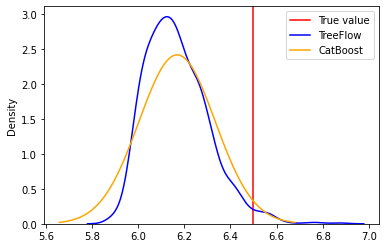

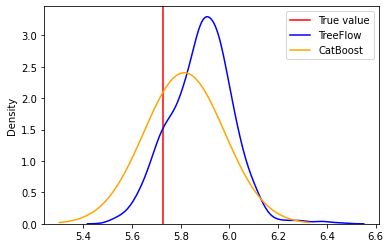

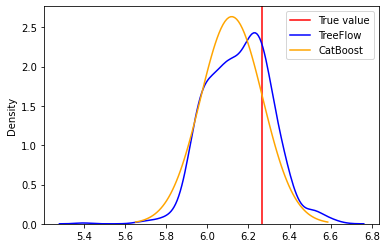

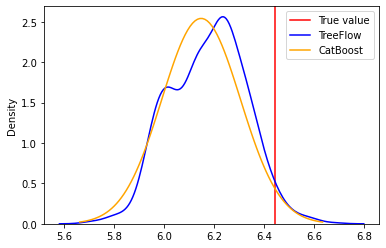

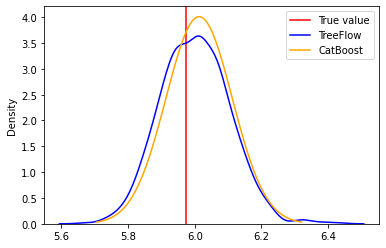

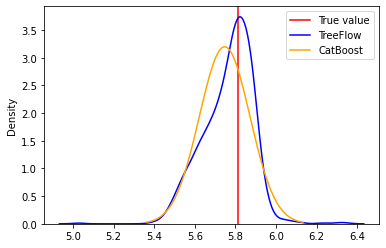

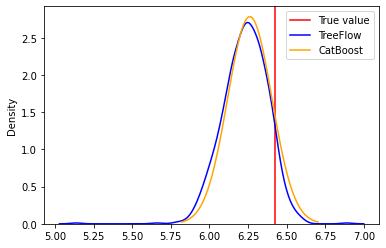

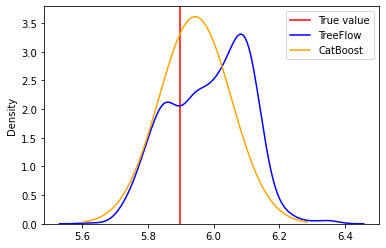

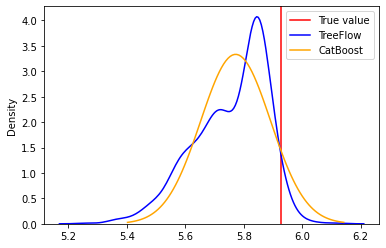

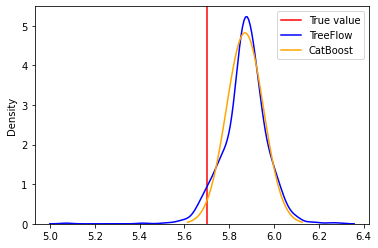

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()